# Robust Scaler
Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 <br>
1-10 precentile---10% of all values in this group is less than 1 <br>
4-40%

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('titanic_train.csv',usecols=['Pclass','Age','Fare','Survived'])

In [3]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [4]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

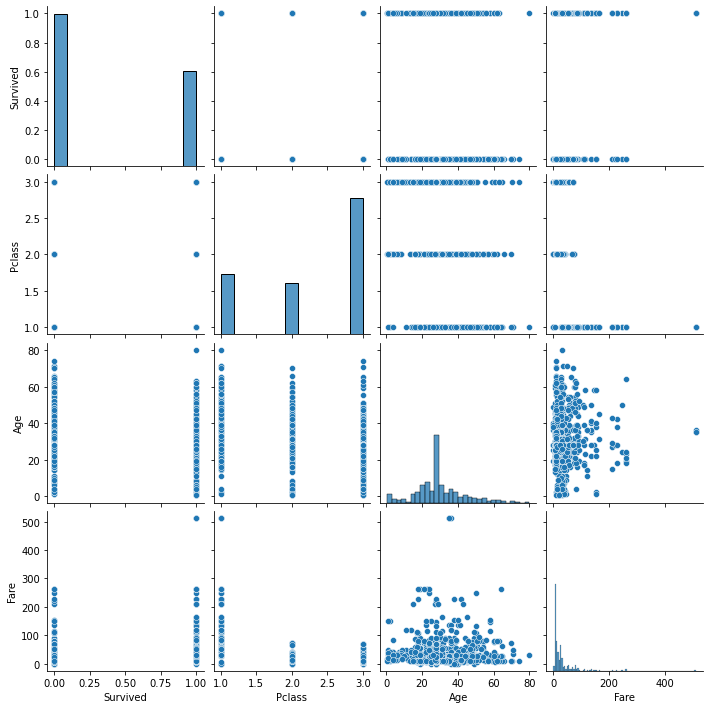

In [6]:
sns.pairplot(df)

# For Visualization purpose :

In [5]:
from sklearn.preprocessing import RobustScaler
robust=RobustScaler()
df_robust_scaler=pd.DataFrame(robust.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


Text(0.5, 1.0, 'P class before scaled')

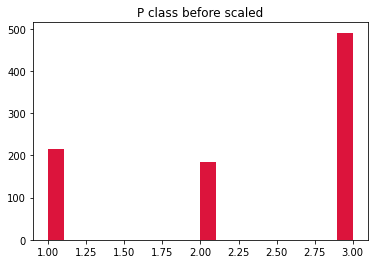

In [7]:
plt.hist(df['Pclass'],bins=20,color='crimson')
plt.title('P class before scaled')

Text(0.5, 1.0, 'P class After scaled')

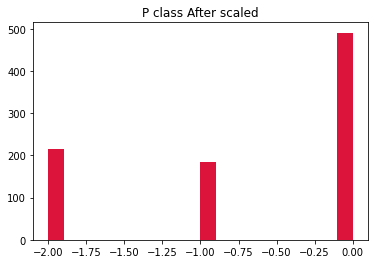

In [8]:
plt.hist(df_robust_scaler['Pclass'],bins=20,color='crimson')
plt.title('P class After scaled')

Text(0.5, 1.0, 'Age before scaled')

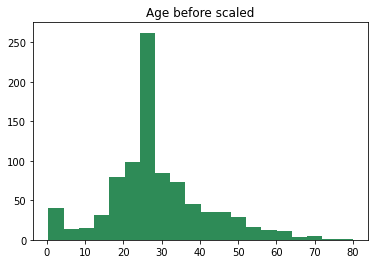

In [9]:
plt.hist(df['Age'],bins=20,color='seagreen')
plt.title('Age before scaled')

Text(0.5, 1.0, 'Age After scaled')

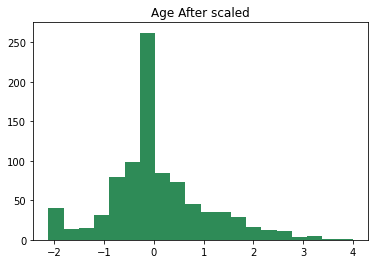

In [10]:
plt.hist(df_robust_scaler['Age'],bins=20,color='seagreen')
plt.title('Age After scaled')

Text(0.5, 1.0, 'Fare before scaled')

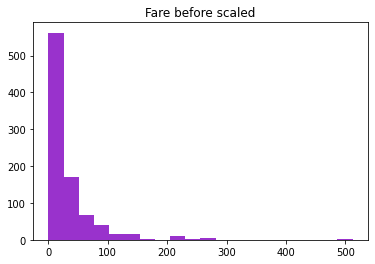

In [11]:
plt.hist(df['Fare'],bins=20,color='darkorchid')
plt.title('Fare before scaled')

Text(0.5, 1.0, 'Fare After scaled')

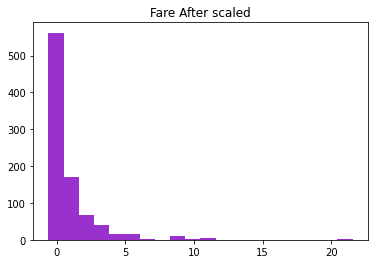

In [12]:
plt.hist(df_robust_scaler['Fare'],bins=20,color='darkorchid')
plt.title('Fare After scaled')

## For model Purpose :

In [13]:
#Separating the independent and dependent features
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [14]:
x # Printing the x  # Independent Data

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


In [15]:
y #Dependent data

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.preprocessing import RobustScaler
robust=RobustScaler()
x_train_robust=pd.DataFrame(robust.fit_transform(x_train),columns=['Pclass','Age','Fare'])
x_train_robust.head()

,Pclass,Age,Fare
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


In [18]:
x_train_robust # Printing the  Independent Training Data

,Pclass,Age,Fare
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630
...,...,...,...
591,0.0,-0.538462,-0.291400
592,-2.0,0.000000,0.708600
593,0.0,1.000000,-0.014814
594,-2.0,-1.076923,4.520163


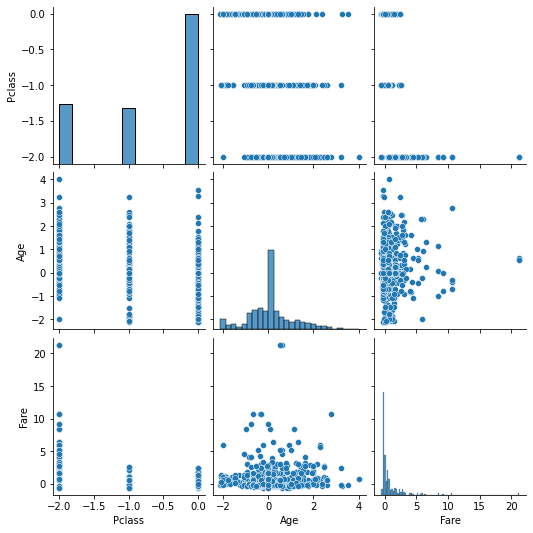

In [19]:
sns.pairplot(x_train_robust)
#pairplot of x_train_robust showing that the values are scaled b/w 0 and 1"

In [20]:
# scaling the x_test data
x_test_robust=robust.transform(x_test)

In [21]:
x_test_robust

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

In [22]:
### Model Building
## fit() for training and predict for test

### Algorithm starts :

In [24]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()

In [25]:
classification.fit(x_train_robust,y_train)

LogisticRegression()

In [26]:
pred=classification.predict(x_test_robust) # Machine prediction on testing data

In [27]:
pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
#Printing the classification report

from sklearn import metrics
print(metrics.classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       218
           1       0.47      0.74      0.58        77

    accuracy                           0.72       295
   macro avg       0.68      0.73      0.68       295
weighted avg       0.78      0.72      0.73       295

